In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from adjustText import adjust_text
import contextily as ctx
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Read the data from the CSV file including 'Year' and 'Country'
df = pd.read_csv("merged_data.csv", usecols=['Year', 'Country', 'GDP', 'Life expectancy'])

# Filter data for the year 2005 and drop duplicates
# df = df[df['Year'] == 2005].drop_duplicates()

# Debug: Print the filtered data
print("Filtered Data:")
print(df)
#
# Separate the columns to be normalized
columns_to_normalize = ['GDP', 'Life expectancy']
columns_not_to_normalize = ['Year', 'Country']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data to be normalized
normalized_data = scaler.fit_transform(df[columns_to_normalize])

# Debug: Print the normalized data
print("\nNormalized Data:")
print(normalized_data)

# Create a DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Combine the non-normalized columns with the normalized columns
final_df = pd.concat([df[columns_not_to_normalize].reset_index(drop=True), normalized_df], axis=1)

# Debug: Print the final DataFrame
print("\nFinal DataFrame:")
print(final_df)

# Save the normalized data to a new CSV file
final_df.to_csv("Normalized_Dataset.csv", index=False)


Filtered Data:
            Country  Year  Life expectancy          GDP
0       Afghanistan  2015             65.0  1886.692977
1       Afghanistan  2015             65.0  1886.692977
2       Afghanistan  2015             65.0  1886.692977
3       Afghanistan  2015             65.0  1886.692977
4       Afghanistan  2015             65.0  1886.692977
...             ...   ...              ...          ...
459195     Zimbabwe  2000             46.0  2344.271146
459196     Zimbabwe  2000             46.0  2344.271146
459197     Zimbabwe  2000             46.0  2344.271146
459198     Zimbabwe  2000             46.0  2344.271146
459199     Zimbabwe  2000             46.0  2344.271146

[459200 rows x 4 columns]

Normalized Data:
[[0.01167751 0.54459203]
 [0.01167751 0.54459203]
 [0.01167751 0.54459203]
 ...
 [0.01538017 0.18406072]
 [0.01538017 0.18406072]
 [0.01538017 0.18406072]]

Final DataFrame:
        Year      Country       GDP  Life expectancy
0       2015  Afghanistan  0.011678      

In [4]:
final_df = final_df[df['Year'] == 2010].drop_duplicates()
final_df.dropna(subset=['GDP'], inplace=True)
final_df.to_csv("Normalized_Dataset.csv", index=False)

/tmp/ipykernel_5961/1202745853.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


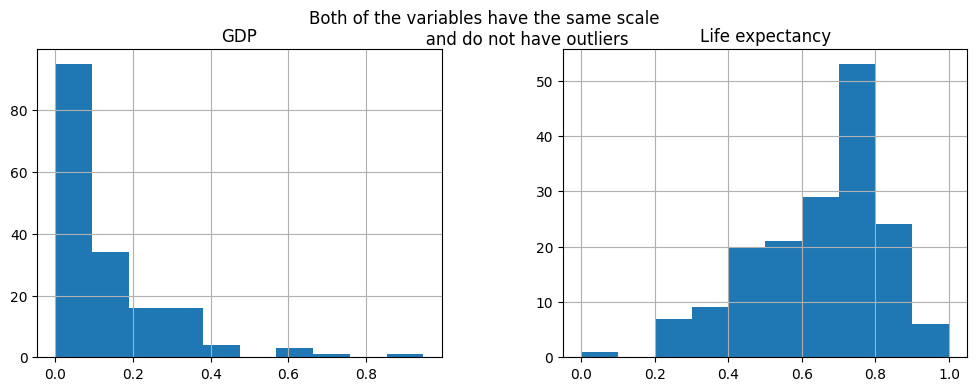

In [5]:
data = gpd.read_file('Normalized_Dataset.csv')
data.head()
data['GDP'] = pd.to_numeric(data['GDP'], errors='coerce')
data['Life expectancy'] = pd.to_numeric(data['Life expectancy'], errors='coerce')
import geopandas as gpd
import matplotlib.pyplot as plt

# Laad de dataset met landen grenzen

border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the non-spatial data with the spatial GeoDataFrame based on the country name
# Assuming 'Country' in CSV and 'name' in border GeoDataFrame
merged_data = border.merge(data, left_on='name', right_on='Country')
# Plot histograms of the 'GDP' and 'Life expectancy' columns
data[['GDP', 'Life expectancy']].hist(figsize=(12, 4))
plt.suptitle('Both of the variables have the same scale \n \
              and do not have outliers')
plt.show()

In [6]:
bins = [0, 0.33, 0.66, 1]

# Bin the first variable - x
data['Var1_Class'] = pd.cut(data['GDP'], bins=bins, include_lowest=True)
data['Var1_Class'] = data['Var1_Class'].astype('str')

# Bin the second variable - y
data['Var2_Class'] = pd.cut(data['Life expectancy'], bins=bins, include_lowest=True)
data['Var2_Class'] = data['Var2_Class'].astype('str')

# Code created x bins to 1, 2, 3
x_class_codes = np.arange(1, len(bins))
d = dict(zip(data['Var1_Class'].value_counts().sort_index().index, x_class_codes))
data['Var1_Class'] = data['Var1_Class'].replace(d)

# Code created y bins to A, B, C
y_class_codes = ['A', 'B', 'C']
d = dict(zip(data['Var2_Class'].value_counts().sort_index().index, y_class_codes))
data['Var2_Class'] = data['Var2_Class'].replace(d)

# Combine x and y codes to create Bi_Class
data['Bi_Class'] = data['Var1_Class'].astype('str') + data['Var2_Class']

print('Number of unique elements in Var1_Class =', len(data['Var1_Class'].unique()))
print('Number of unique elements in Var2_Class =', len(data['Var2_Class'].unique()))
print('Number of unique elements in Bi_Class =', len(data['Bi_Class'].unique()))



Number of unique elements in Var1_Class = 3
Number of unique elements in Var2_Class = 3
Number of unique elements in Bi_Class = 5


/tmp/ipykernel_5961/4241941017.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Var1_Class'] = data['Var1_Class'].replace(d)


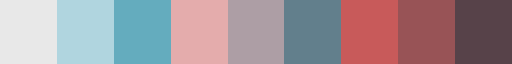

In [7]:
# All colors to create a complete legend
all_colors = ['#e8e8e8', '#b0d5df', '#64acbe', '#e4acac', '#ad9ea5', '#627f8c', '#c85a5a', '#985356', '#574249']
cmap = matplotlib.colors.ListedColormap(all_colors)
cmap

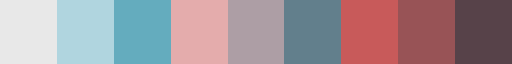

In [8]:
# Set of colors matching the elements of Bi_Class
# We have to exclude those that did not come up in the data
colors = ['#e8e8e8', # 1A
          '#b0d5df', # 1B
          '#64acbe', # 1C
          '#e4acac', # 2A
          '#ad9ea5', # 2B
          '#627f8c', # 2C
          '#c85a5a', # 3A
          '#985356', # 3B
          '#574249'] # 3C
            
cmap = matplotlib.colors.ListedColormap(colors)
cmap

/tmp/ipykernel_5961/585618850.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/tmp/ipykernel_5961/585618850.py:49: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  merged_data.to_crs('EPSG:3857').plot(ax=ax,


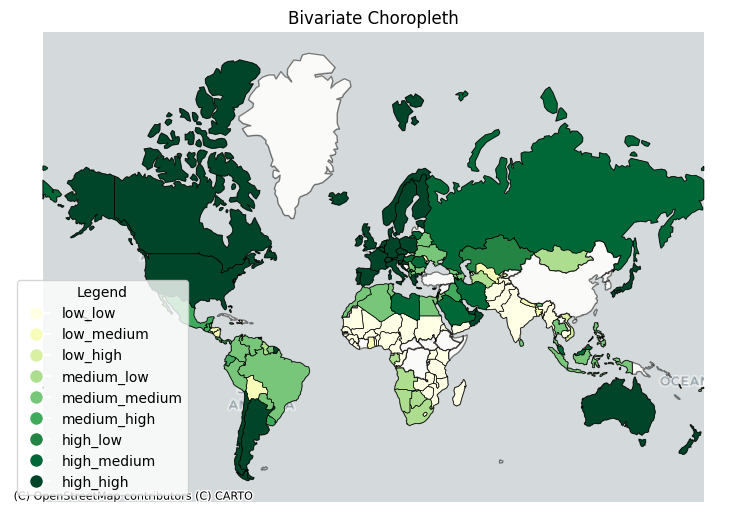

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Load the CSV file
data = pd.read_csv('Normalized_Dataset.csv')

# Convert the 'GDP' and 'Life expectancy' columns to numeric
data['GDP'] = pd.to_numeric(data['GDP'], errors='coerce')
data['Life expectancy'] = pd.to_numeric(data['Life expectancy'], errors='coerce')

# Load the dataset with country borders
border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
border = border[border['name'] != 'Antarctica']
# Merge the non-spatial data with the spatial GeoDataFrame based on the country name
# Assuming 'Country' in CSV and 'name' in border GeoDataFrame
merged_data = border.merge(data, left_on='name', right_on='Country')

# Ensure the GeoDataFrame has a CRS set
if merged_data.crs is None:
    merged_data = merged_data.set_crs('EPSG:4326')  # Assuming WGS84

# Add the 'Bi_Class' column to your data for bivariate choropleth (example here)
# This should be defined according to your specific logic
merged_data['Bi_Class'] = pd.qcut(merged_data['GDP'], 3, labels=['low', 'medium', 'high']).astype(str) + \
                          pd.qcut(merged_data['Life expectancy'], 3, labels=['_low', '_medium', '_high']).astype(str)

# Define custom colors for each category
category_colors = {
    'low_low': '#ffffe5',  # low GDP, low life expectancy
    'low_medium': '#f7fcb9',  # low GDP, medium life expectancy
    'low_high': '#d9f0a3',  # low GDP, high life expectancy
    'medium_low': '#addd8e',  # medium GDP, low life expectancy
    'medium_medium': '#78c679',  # medium GDP, medium life expectancy
    'medium_high': '#41ab5d',  # medium GDP, high life expectancy
    'high_low': '#238443',  # high GDP, low life expectancy
    'high_medium': '#006837',  # high GDP, medium life expectancy
    'high_high': '#004529'  # high GDP, high life expectancy
}
merged_data['color'] = merged_data['Bi_Class'].map(category_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Step 1: Draw the map
border.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.5)  # country borders
merged_data.to_crs('EPSG:3857').plot(ax=ax,
                                     column='Bi_Class',  # variable that is going to be used to color the map
                                     legend=False,  # we're going to draw the legend ourselves
                                     categorical=True,  # bivariate choropleth has to be colored as categorical map
                                     color=merged_data['color'],
                                     linewidth=0.5,
                                     edgecolor='black',
                                     legend_kwds={'loc': 'lower left'})  # position of legend

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.tight_layout()  # "tighten" two figures map and basemap
plt.axis('off')  # we don't need axis with coordinates
ax.set_title('Bivariate Choropleth')

# Step 2: Draw the legend
# Create a custom legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                  for label, color in category_colors.items()]
ax.legend(handles=legend_handles, loc='lower left', title='Legend')

plt.show()
